## Import Dependency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Data Collection and Processing

In [6]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Handling Missing Values

In [11]:
df.drop(columns="Cabin", inplace=True)

In [12]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

<ipython-input-12-f1dfd8b2652b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


In [15]:
df['Embarked'].fillna(df["Embarked"].mode()[0], inplace=True)

<ipython-input-15-6ed766054a1c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df["Embarked"].mode()[0], inplace=True)


## Data Analysis

In [21]:
df.describe(include="object")

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


<Axes: xlabel='Survived', ylabel='count'>

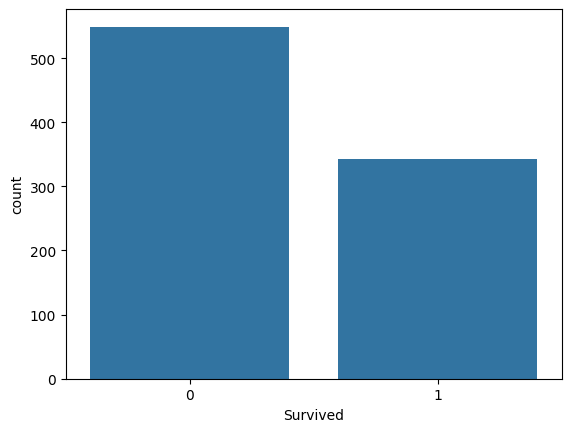

In [22]:
sns.countplot(data=df, x="Survived")

In [23]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

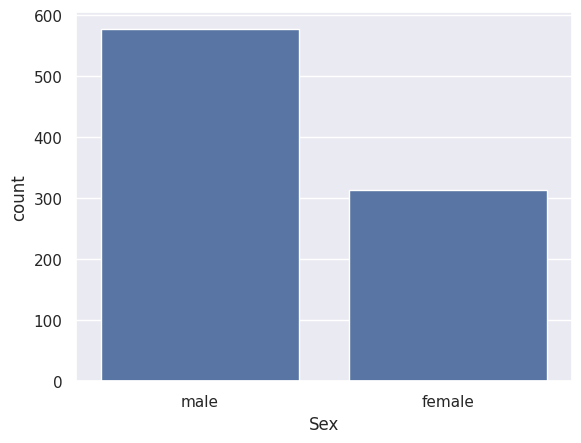

In [30]:
sns.countplot(data=df, x="Sex")

<Axes: xlabel='Sex', ylabel='count'>

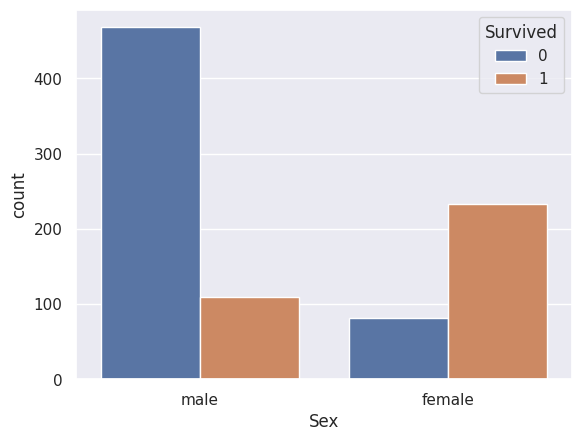

In [31]:
sns.countplot(data=df, x="Sex", hue="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

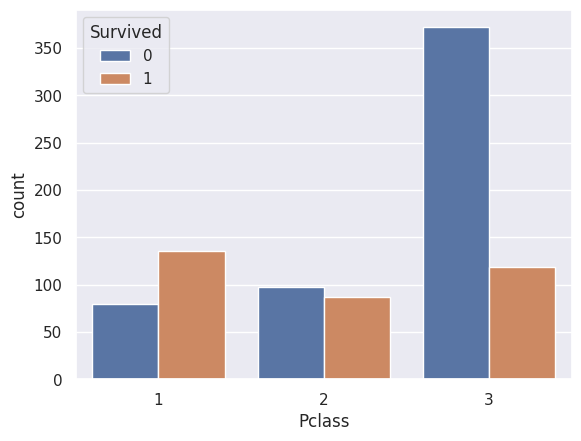

In [33]:
sns.countplot(data=df, x="Pclass", hue="Survived")

<Axes: xlabel='Embarked', ylabel='count'>

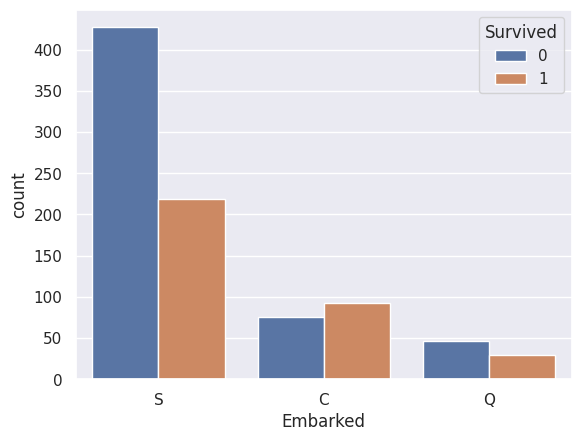

In [35]:
sns.countplot(data=df, x="Embarked", hue="Survived")

## Data Preprocessing

In [37]:
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

In [45]:
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

In [46]:
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

<Axes: >

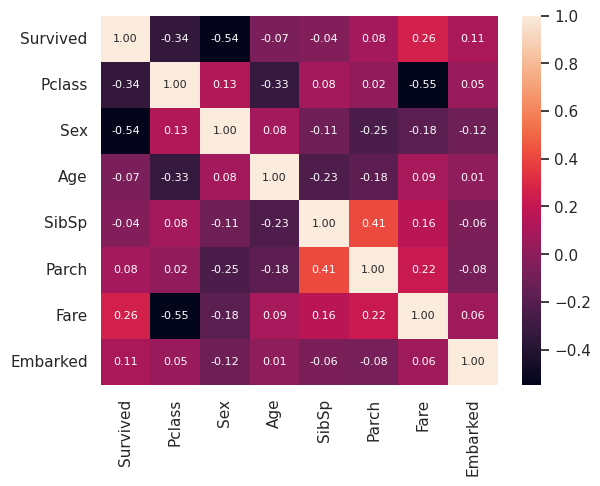

In [47]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f")

In [48]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


#Seperating Labels and target

In [50]:
X = df.drop(columns="Survived", axis=1)
y = df["Survived"]

In [51]:
print(X.shape, y.shape)

(891, 7) (891,)


###Train Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [53]:
print(X_train.shape, X_test.shape, X.shape)

(712, 7) (179, 7) (891, 7)


In [54]:
model = LogisticRegression()

In [55]:
model.fit(X_train, y_train)
training_data_pred = model.predict(X_train)
training_accuracy_score = accuracy_score(y_train, training_data_pred)
print("Training Accuracy Score: ", training_accuracy_score)

Training Accuracy Score:  0.8047752808988764


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
testing_data_pred = model.predict(X_test)
testing_accuracy_score = accuracy_score(y_test, testing_data_pred)
print("Testing Accuracy Score: ", testing_accuracy_score)

Testing Accuracy Score:  0.7877094972067039


### Building a Predictive Model

In [59]:
input_data = [1,0,38.0,1,0,71.2833,1]
inputdata_asarray = np.asarray(input_data)
inputdata_reshaped = inputdata_asarray.reshape(1, -1)
prediction = model.predict(inputdata_reshaped)
if prediction[0] == 1:
  print("Estimated to be survived")
else:
  print("Estimated to die")

Estimated to be survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [60]:
import joblib

In [61]:
joblib.dump(model, "model.pkl")

['model.pkl']